Licence CC BY-NC-ND, Valérie Roy & Thierry Parmentelat

In [ ]:
from IPython.display import HTML
HTML(url="https://raw.githubusercontent.com/ue12-p22/python-numerique/main/notebooks/_static/style.html")



# TP simple avec des images

merci à Wikipedia et à stackoverflow

**vous n'allez pas faire ici de traitement d'image  
on se sert d'images pour égayer des exercices avec `numpy`  
(et parce que quand on se trompe: on le voit)**

**Notions intervenant dans ce TP**

* création, indexation, slicing, modification  de `numpy.ndarray`
* affichage d'image (RBG, RGB-A, niveaux de gris)
* lecture de fichier `jpg`
* les autres notions utilisées sont rappelées (très succinctement)

**N'oubliez pas d'utiliser le help en cas de problème.**

## import des librairies

1. Importez la librairie `numpy`
<br>

1. Importez la librairie `matplotlib.pyplot`  
ou toute autre librairie d'affichage que vous aimez et/ou savez utiliser `seaborn`...
<br>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## création d'une image de couleur

**Rappels (rapides)**

* dans une image en couleur, les pixels sont représentés par leurs *dosages* dans les 3 couleurs primaires: `red`, `green`, `blue`  
* si le pixel vaut `(r, g, b) = (255, 0, 0)`, il ne contient que de l'information rouge, il est affiché comme du rouge
* l'affichage à l'écran, d'une image couleur `rgb`, utilise les règles de la synthèse additive  
`(r, g, b) = (255, 255, 255)` donne la couleur blanche    
`(r, g, b) = (0, 0, 0)` donne la couleur noire    
`(r, g, b) = (255, 255, 0)` donne la couleur jaune ...
<img src='media/synthese-additive.png' width=200>

* pour afficher le tableau `im` comme une image, utilisez: `plt.imshow(im)`
* pour afficher plusieurs images dans une même cellule de notebook faire `plt.show()` après chaque `plt.imshow(...)`

**Exercices**

1. Créez un tableau blanc, de 91 pixels de côté, d'entiers non-signés 8 bits et affichez-le  
   indices:   
   . le tableau n'est pas forcément initialisé à ce stade  
   . il vous faut pouvoir stocker 3 uint8 par pixel pour ranger les 3 couleurs
1. Transformez le en tableau noir (en un seul slicing) et affichez-le
1. Transformez le en tableau jaune (en un seul slicing) et affichez-le
1. Affichez les valeurs RGB du premier pixel de l'image, et du dernier
1. Faites un quadrillage d'une ligne bleue, toutes les 10 lignes et colonnes et affichez-le
1. Affichez les valeurs RGB du premier et du dernier pixel de l'image

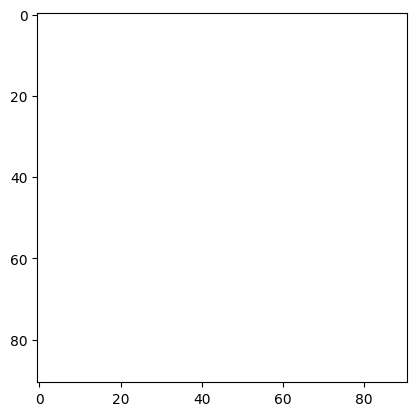

In [4]:
tab= np.ones(shape=(91,91,3), dtype=np.uint8)
tab[:,:,:]=255   #ici on fait un slicing c'est plus pratique
plt.imshow(tab);



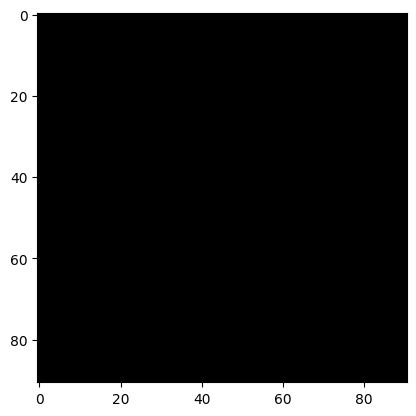

In [5]:
tab[:,:,:]=0
plt.imshow(tab);



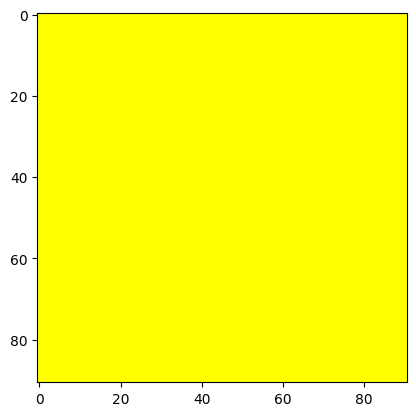

In [6]:
tab[:,:,0:2]=255  #on aurait aussi pu faire tab[:,:]=(255,255,0)
plt.imshow(tab);

In [7]:
tab[0,0], tab[-1,-1]

(array([255, 255,   0], dtype=uint8), array([255, 255,   0], dtype=uint8))

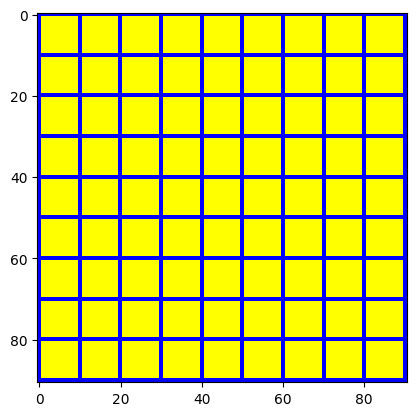

In [8]:
tab[0:92:10,:]=(0,0,255)
tab[:,0:92:10]=(0,0,255)
plt.imshow(tab);

In [9]:
tab[0,0], tab[-1,-1]

(array([  0,   0, 255], dtype=uint8), array([  0,   0, 255], dtype=uint8))

## lecture d'une image en couleur

1. Avec la fonction `plt.imread` lisez le fichier `les-mines.jpg`  
ou toute autre image - *faites juste attention à la taille*

1. Vérifiez si l'objet est modifiable avec `im.flags.writeable`  
si il ne l'est pas copiez-le

1. Affichez l'image 

1. Quel est le type de l'objet créé ?

1. Quelle est la dimension de l'image ?

1. Quelle est la taille de l'image en hauteur et largeur ?

1. Quel est le nombre d'octets utilisé par pixel ?  

1. Quel est le type des pixels ?  
(deux types pour les pixels: entiers non-signés 8 bits ou flottants sur 64 bits)

1. Quelles sont ses valeurs maximale et minimale des pixels ?

1. Affichez le rectangle de 10 x 10 pixels en haut de l'image

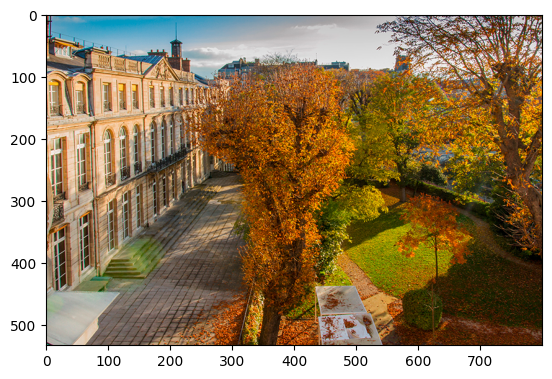

In [10]:
M=plt.imread("les-mines.jpg")
plt.imshow(M);

In [11]:
M.flags.writeable

False

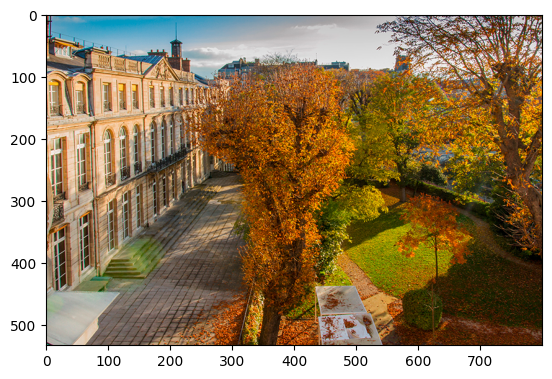

In [12]:
N=M.copy()
plt.imshow(N);

In [13]:
type(N)

numpy.ndarray

In [14]:
np.shape(N)

(533, 800, 3)

In [15]:
np.max(N), np.min(N) #on code sur 8 bits et les couleurs max et min sont n et b

(255, 0)

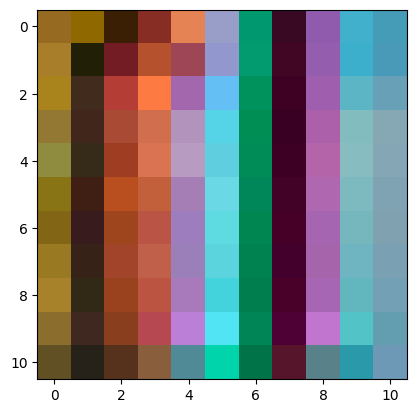

In [16]:
tab=N[0:11,0:11]
plt.imshow(tab);

## accès à des parties d'image

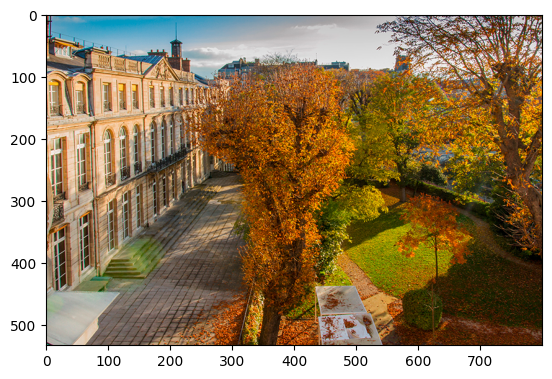

In [17]:
plt.imshow(N);

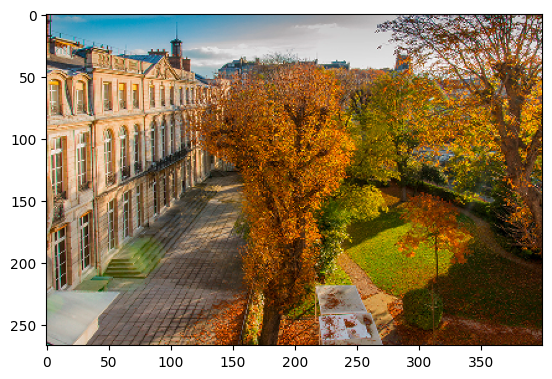

In [18]:
plt.imshow(N[0:534:2,0:800:2]);



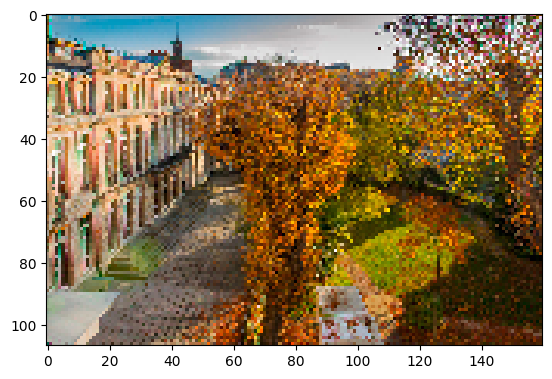

In [19]:
plt.imshow(N[0:534:5,0:800:5]);

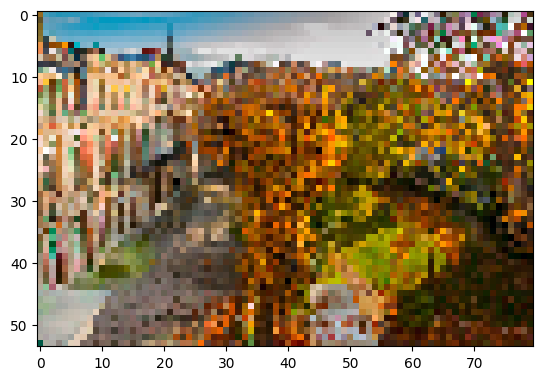

In [20]:
plt.imshow(N[0:534:10,0:800:10]);

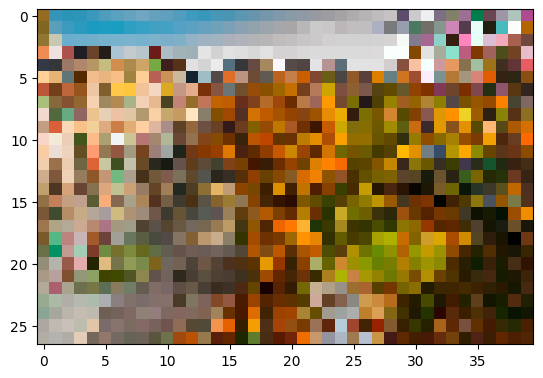

In [21]:
plt.imshow(N[0:534:20,0:800:20]);

o aurait aussi pu faire

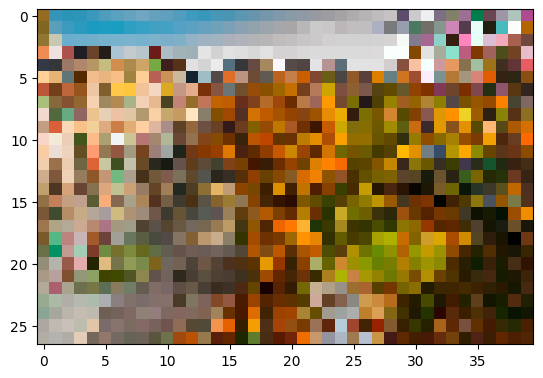

In [22]:
for i in 2,5,10, 20:
    plt.imshow(N[0:534:i,0:800:i]);

1. Relire l'image

1. Slicer et afficher l'image en ne gardant qu'une ligne et qu'une colonne sur 2, 5, 10 et 20  
(ne dupliquez pas le code)

1. Isoler le rectangle de `l` lignes et `c` colonnes en milieu d'image  
affichez-le pour `(l, c) = (10, 20)`) puis `(l, c) = (100, 200)`)

1. Affichez le dernier pixel de l'image

ValueError: x and y can be no greater than 2D, but have shapes (267,) and (267, 400, 3)

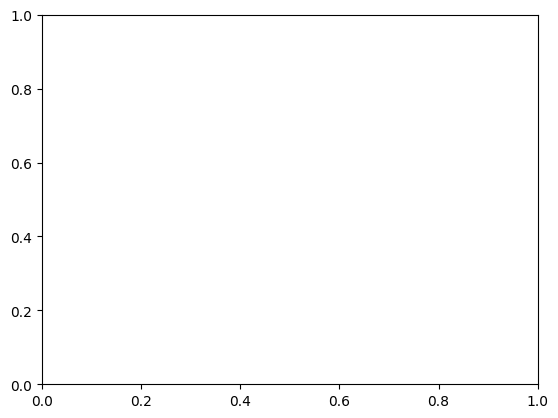

In [23]:
 #autre methode
for step in 2,5,10,20:
    plt.plot(N[:: step, :: step])
    plt.imshow();

In [ ]:
for (l, c) in (10, 20), (100, 200):
    plt.imshow(N[int(533//2-(l/2)): int(533//2+(l/2)), int(400-(c/2)): int(400+(c/2))]);

In [ ]:
plt.imshow(N[-1,-1])

## canaux rgb de l'image

1. Relire l'image
<br>
1. Découpez l'image en ses trois canaux Red, Green et Blue  
<br>

1. Afficher chaque canal avec `plt.imshow`  
    La couleur est-elle la couleur attendue ?  
    Si oui très bien, si non que se passe-t-il ?
    
    **rappel** table des couleurs

    * `RGB` représente directement l'encodage de la couleur du pixel   
    et non un indice dans une table

    * donc pour afficher des pixel avec les 3 valeurs RGB pas besoin de tables de couleurs  
    on a la couleur

    * mais pour afficher une image unidimensionnelle contenant des nombres de `0` à `255`  
    il faut bien lui dire à quoi correspondent les valeurs  
    (lors de l'affichage, le `255` des rouges n'est pas le même `255` des verts)

    * donner le paramètre `cmap=` à `plt.imshow`, `'Reds'`,  `'Greens'` ou  `'Blues'`
    
    <br>
1. Corrigez vos affichages si besoin
<br>
1. Copiez l'image, remplacer dans la copie, un carré de taille `(200, 200)` en bas à droite  
   . par un carré de couleur RGB avec R à 219, G à 112 et B à 147 (vous obtenez quelle couleur)  
   . par un carré blanc avec des rayures horizontales rouges de 1 pixel  
<br>
1. enfin affichez les 20 dernières lignes et colonnes du carré à rayures

In [ ]:
plt.imshow(N);

In [ ]:
R=N[:,:,0]
G=N[:,:,1]
B=N[:,:,2]

In [ ]:
plt.imshow(R, cmap='Reds');

In [ ]:
plt.imshow(G, cmap='Greens');

In [ ]:
plt.imshow(B,  cmap='Blues');

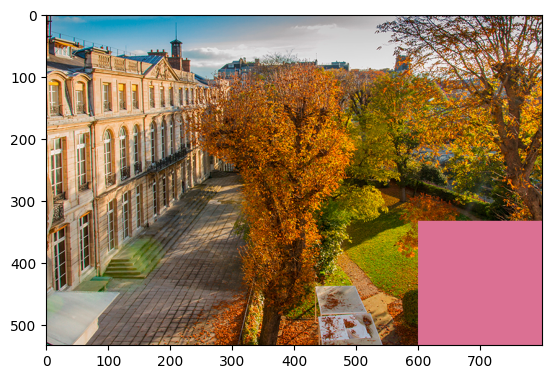

In [27]:
N=M.copy()
N[-200::,-200::]=(219,112,147)
plt.imshow(N);

In [ ]:
N[-200::,-200::]=(255,255,255)
plt.imshow(N);

In [ ]:
N[-200::2,-200::]=(255,0,0)
plt.imshow(N);

In [ ]:

plt.imshow(N[-20::,-20::]);

## transparence des images

**rappel** RGB-A

* on peut indiquer, dans une quatrième valeur des pixels, leur transparence
* ce 4-ème canal s'appelle le canal alpha
* les valeurs vont de `0` pour transparent à `255` pour opaque

1. Relire l'image initiale (sans la copier)

1. Créez un tableau vide de la même hauteur et largeur que l'image, du type de l'image initiale, avec un quatrième canal

1. Copiez-y l'image initiale, mettez le quatrième canal à `128` et affichez l'image

In [ ]:
plt.imshow(M);

In [28]:
im=np.ones(shape=(533, 800, 4), dtype=np.uint8 )
im[:,:,0:3]=M.copy()

In [ ]:
im[...,-1]=128
plt.imshow(im);

## image en niveaux de gris en `float`

1. Relire l'image `les-mines.jpg`

1. Passez ses valeurs en flottants entre 0 et 1 et affichez-la  

1. Transformer l'image en deux images en niveaux de gris :   
a. en mettant pour chaque pixel la moyenne de ses valeurs R, G, B  
b. en utilisant la correction 'Y' (qui corrige le constrate) basée sur la formule  
   G = $0.299\,R + 0.587\,V + 0.114\,B\,$ 

1. Passez au carré les pixels et affichez l'image

1. Passez en racine carré les pixels et affichez-la

1. Convertissez l'image de niveaux de gris en type entier non-signé 8 bits et affichez la  
en niveaux de gris

In [ ]:
plt.imshow(M);

In [ ]:
N=M.copy()
K=np.ones(shape=(533,800,3), dtype=np.uint8)
K=N[...]/255
plt.imshow(K);

In [ ]:
J=np.ones(shape=(533,800,3))
cste= (R+G+B) / (3*255)
for i in 1,2,0:
    J[...,i]=  cste
plt.imshow(J);

In [ ]:
H=np.ones(shape=(533,800,3))
G =  (0.299*R+0.587*G+0.114*B)/255
for i in 0, 1, 2:
    H[...,i]=G
plt.imshow(H);

In [ ]:
HH=H**0.5
plt.imshow(HH);

In [24]:
HHH[:][:][i]*255

NameError: name 'HHH' is not defined

In [25]:
HHH=np.ones(shape=(533,800,3), dtype=np.uint8)
for i in 0,2,3:
    HHH[:,:,:,i]=int(H[:,:,:,i]*255)
plt.imshow(HHH)
#je n'arrive pas à prendre les valeurs une à une avec du slicing la seule methode que je trouve serait d'iterer une boucle for

NameError: name 'H' is not defined

In [26]:
%%timeit
# pour les geeks
gr = (imf[:, :, :].sum(axis=2))/3

NameError: name 'imf' is not defined

# rappels

## affichage grille de figures

Affichage en `matplotlib.pyplot` de plusieurs figures sur une grille

**1) on créé une figure globale et des sous-figures**

les sous-figures sont appelées `axes` par convention `matplotlib`

on construit notre grille ici de 2 lignes et 3 colonnes

```python
fig, axes = plt.subplots(2, 3)
print(type(axes))
print(axes.shape)
```

les cases pour les sous-figures sont ici dans la variable `axes`  
qui est un `numpy.ndarray` de taille 2 lignes et 3 colonnes

**2) on affiche des sous-figure dans des cases de la grille**

```python
x = np.linspace(0, 2*np.pi, 50)
axes[0, 0].plot(x, np.sin(x), 'b')
axes[0, 1].plot(x, np.sin(x), 'r')
axes[0, 2].plot(x, np.sin(x), 'y')
axes[1, 0].plot(x, np.sin(x), 'k')
axes[1, 1].plot(x, np.sin(x), 'g')
axes[1, 2].plot(x, np.sin(x), 'm')
```

**3) on peut faire un peu de cosmétique mais**  
quand on commence on ne s'arrête plus et on perd beaucoup de temps  
préférez au début des affichages minimalistes à peu près lisibles
```python
fig.suptitle("sinus en couleur", fontsize=20) # titre général
axes[0, 0].set_title('sinus bleu')            # titre d'une sous-figure
axes[0, 2].set_xlabel('de 0 à 2 pi')          # label des abscisses
axes[1, 1].set_ylabel('de -1 à 1')            # label d'ordonnées
axes[1, 2].set_title('sinus magenta')
plt.tight_layout()                            # ajustement automatique des paddings
```

<class 'numpy.ndarray'>
(2, 3)


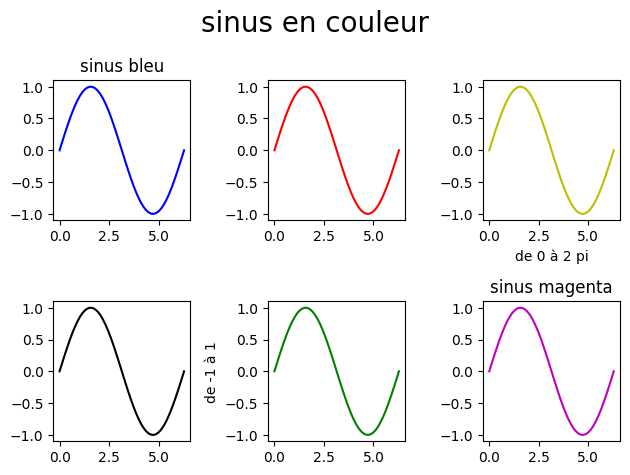

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# le code
fig, axes = plt.subplots(2, 3)
print(type(axes))
print(axes.shape)

x = np.linspace(0, 2*np.pi, 50)

axes[0, 0].plot(x, np.sin(x), 'b')
axes[0, 1].plot(x, np.sin(x), 'r')
axes[0, 2].plot(x, np.sin(x), 'y')
axes[1, 0].plot(x, np.sin(x), 'k')
axes[1, 1].plot(x, np.sin(x), 'g')
axes[1, 2].plot(x, np.sin(x), 'm')

fig.suptitle("sinus en couleur", fontsize=20)
axes[0, 0].set_title('sinus bleu')
axes[0, 2].set_xlabel('de 0 à 2 pi')
axes[1, 1].set_ylabel('de -1 à 1')
axes[1, 2].set_title('sinus magenta')
plt.tight_layout()

## application

Reprenez les trois images en niveau de gris que vous aviez produites ci-dessus:  
  1: celle obtenue avec la moyenne des rgb  
  2: celle obtenue avec la correction Y  
  3: celle obtenue avec la racine carrée 

1. Affichez les trois images côte à côte 
   1 2 3
1. Affichez-les en damier:  
   1 2 3  
   3 1 2  
   2 3 1

<class 'numpy.ndarray'>
(3, 3)


NameError: name 'J' is not defined

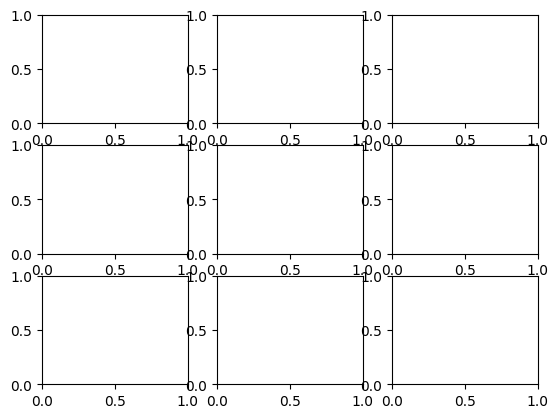

In [29]:
# votre code
fig, axes = plt.subplots(3, 3)
print(type(axes))
print(axes.shape)

for i in 0,1,2:
    axes[i, i]=plt.imshow(J)
    axes[i, (i+1) %3]=plt.imshow(H)
    axes[i, (i+2)%3]=plt.imshow(HH)


fig.suptitle("damier", fontsize=20)

plt.tight_layout()